In [1]:
import numpy as np
import pandas as pd

In [2]:
callsDF = pd.read_csv('callsf0d4f5a.csv')

In [3]:
callsDF.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [4]:
callsDF.shape

(71810, 7)

In [5]:
reasonsDF = pd.read_csv('reason18315ff.csv')


In [6]:
reasonsDF.head()


,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [7]:
 reasonsDF.isnull().sum()

call_id                0
primary_call_reason    0
dtype: int64

In [8]:
reasonsDF.shape

(66653, 2)

In [9]:
sentimentsDF = pd.read_csv('sentiment_statisticscc1e57a.csv')

In [10]:
sentimentsDF.shape

(71810, 6)

In [11]:
sentimentsDF.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [12]:
customerDF = pd.read_csv('customers2afd6ea.csv')

In [13]:
customerDF.shape

(71810, 3)

In [14]:
customerDF.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [15]:


# Merge callsDF and reasonsDF on 'call_id' to get call reasons into the main DataFrame
mergedDF = pd.merge(callsDF, reasonsDF, on='call_id')

# Now merge with sentimentsDF (assuming it has 'call_id')
mergedDF = pd.merge(mergedDF, sentimentsDF, on='call_id', how='left')

# Now merge with customerDF (assuming it has 'customer_id')
mergedDF = pd.merge(mergedDF, customerDF, on='customer_id', how='left')




In [16]:
mergedDF

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,Matthew Foster,4.0
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Booking,519057,calm,neutral,0.02,0.35,Tammy Walters,NaN
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,IRROPS,158319,neutral,polite,-0.13,0.32,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,Upgrade,488324,neutral,frustrated,-0.20,0.20,David Wilkins,2.0
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Seating,721730,neutral,polite,-0.05,0.35,Elizabeth Daniels,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,8/31/2024 23:51,8/31/2024 23:57,9/1/2024 0:07,\n\nAgent: Thank you for calling United Airlin...,Mileage Plus,783441,neutral,frustrated,-0.19,0.51,Kevin Warner,2.0
66649,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,Post Flight,413148,calm,calm,0.05,0.34,Dennis Singleton DDS,NaN
66650,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,Upgrade,980156,calm,frustrated,0.03,0.22,Paul Mitchell,1.0
66651,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,Upgrade,616988,calm,polite,0.05,0.42,Kaylee Lang,NaN


In [18]:
mergedDF

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code,handle_time,waiting_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,Matthew Foster,4.0,2280.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Booking,519057,calm,neutral,0.02,0.35,Tammy Walters,NaN,900.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,IRROPS,158319,neutral,polite,-0.13,0.32,Jeffery Dixon,NaN,1620.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,Upgrade,488324,neutral,frustrated,-0.20,0.20,David Wilkins,2.0,720.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Seating,721730,neutral,polite,-0.05,0.35,Elizabeth Daniels,0.0,1140.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,Mileage Plus,783441,neutral,frustrated,-0.19,0.51,Kevin Warner,2.0,960.0,360.0
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,Post Flight,413148,calm,calm,0.05,0.34,Dennis Singleton DDS,NaN,2220.0,540.0
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,Upgrade,980156,calm,frustrated,0.03,0.22,Paul Mitchell,1.0,660.0,180.0
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,Upgrade,616988,calm,polite,0.05,0.42,Kaylee Lang,NaN,720.0,360.0


In [27]:


# Assuming `mergedDF` is the dataframe
# 1. Convert columns to proper formats
mergedDF['call_start_datetime'] = pd.to_datetime(mergedDF['call_start_datetime'])
mergedDF['agent_assigned_datetime'] = pd.to_datetime(mergedDF['agent_assigned_datetime'])
mergedDF['call_end_datetime'] = pd.to_datetime(mergedDF['call_end_datetime'])

# Convert handle_time and waiting_time to numeric (in case of strings)
mergedDF['handle_time'] = pd.to_numeric(mergedDF['handle_time'], errors='coerce')
mergedDF['waiting_time'] = pd.to_numeric(mergedDF['waiting_time'], errors='coerce')

# 2. Clean primary_call_reason by removing extra spaces and normalizing
mergedDF['primary_call_reason'] = mergedDF['primary_call_reason'].str.strip().str.lower()
mergedDF['primary_call_reason'] = mergedDF['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)

# 3. Calculate AHT and AST
total_calls = len(mergedDF)

# AHT: Total Handle Time / Total Number of Calls
total_handle_time = mergedDF['handle_time'].sum()
AHT = total_handle_time / total_calls

# AST: Total Waiting Time / Total Number of Calls
total_waiting_time = mergedDF['waiting_time'].sum()
AST = total_waiting_time / total_calls

print(f"Average Handle Time (AHT): {AHT} seconds")
print(f"Average Speed to Answer (AST): {AST} seconds")

# 4. Analyze factors contributing to AHT (group by primary call reason)
# Get both frequency and AHT
call_reason_stats = mergedDF.groupby('primary_call_reason').agg(
    frequency=('primary_call_reason', 'size'),
    average_aht=('handle_time', 'mean')
).sort_values(by='average_aht', ascending=False)

print("\nCall Reason Frequency and AHT:")
print(call_reason_stats)

# 5. Most and least frequent call reasons
most_frequent_reason = call_reason_stats['frequency'].idxmax()
least_frequent_reason = call_reason_stats['frequency'].idxmin()

most_frequent_aht = call_reason_stats.loc[most_frequent_reason, 'average_aht']
least_frequent_aht = call_reason_stats.loc[least_frequent_reason, 'average_aht']

# Calculate percentage difference
percentage_difference = ((most_frequent_aht - least_frequent_aht) / least_frequent_aht) * 100

print(f"\nMost Frequent Call Reason: {most_frequent_reason} with AHT: {most_frequent_aht:.2f} seconds")
print(f"Least Frequent Call Reason: {least_frequent_reason} with AHT: {least_frequent_aht:.2f} seconds")
print(f"\nPercentage difference in AHT between most and least frequent call reasons: {percentage_difference:.2f}%")

# 6. Additional insights on agent/customer sentiment and call duration
agent_sentiment_aht = mergedDF.groupby('agent_tone')['handle_time'].mean()
customer_sentiment_aht = mergedDF.groupby('customer_tone')['handle_time'].mean()

print("\nAHT by Agent Tone:")
print(agent_sentiment_aht)

print("\nAHT by Customer Tone:")
print(customer_sentiment_aht)


Average Handle Time (AHT): 1134.1488005041033 seconds
Average Speed to Answer (AST): 436.97207927625163 seconds

Call Reason Frequency and AHT:
                     frequency  average_aht
primary_call_reason                        
checkout                  1888  1741.557203
etc                        952  1507.184874
post-flight               4330  1502.327945
mileage plus              5851  1356.588617
voluntary cancel          1607  1261.381456
unaccompanied minor        104  1207.500000
voluntary change         10848  1179.640487
irrops                   13311  1145.197205
traveler updates           937  1083.265742
communications            3840  1066.687500
products & services       3332  1049.009604
seating                   6365  1045.819324
check-in                  1519   933.140224
upgrade                   2738   930.832725
check in                   385   917.454545
digital support           1225   878.008163
baggage                   2832   875.741525
disability          


Average Handle Time (AHT) by Agent Tone:
agent_tone
neutral       1184.098972
calm          1071.050607
frustrated    1043.647469
angry          814.262295
polite         685.185185
Name: handle_time, dtype: float64


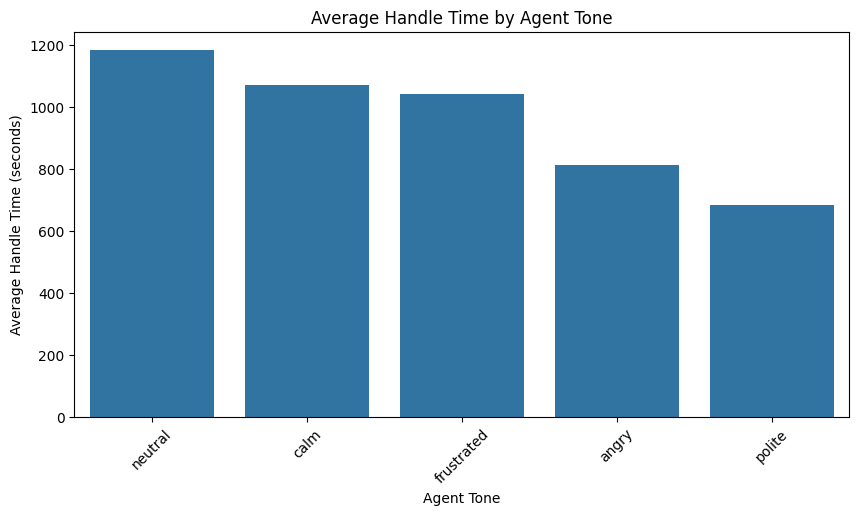


Average Handle Time (AHT) by Call Type:
primary_call_reason
checkout               1741.557203
etc                    1507.184874
post-flight            1502.327945
mileage plus           1356.588617
voluntary cancel       1261.381456
unaccompanied minor    1207.500000
voluntary change       1179.640487
irrops                 1145.197205
traveler updates       1083.265742
communications         1066.687500
products & services    1049.009604
seating                1045.819324
check-in                933.140224
upgrade                 930.832725
check in                917.454545
digital support         878.008163
baggage                 875.741525
disability              795.632754
schedule change         730.834473
booking                 667.963595
other topics            588.850856
Name: handle_time, dtype: float64


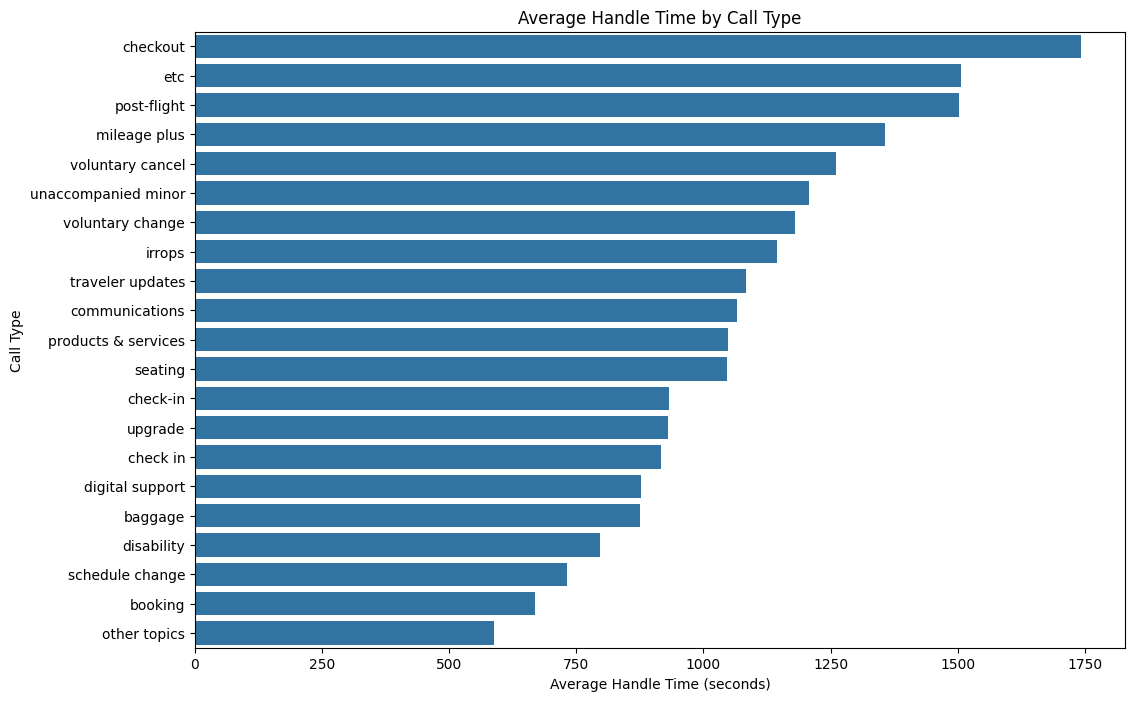


Average Handle Time (AHT) by Agent and Customer Tone:
customer_tone        angry         calm   frustrated      neutral       polite
agent_tone                                                                    
angry           939.166667   801.904762   811.084337   737.368421   785.000000
calm           1060.022051  1078.995870  1072.465362  1072.934313  1070.680376
frustrated     1044.585799  1040.598425  1001.589958  1099.137931  1033.613445
neutral        1182.712753  1186.935117  1179.000767  1195.381132  1176.431795
polite          813.750000   676.000000   652.500000   693.750000   600.000000


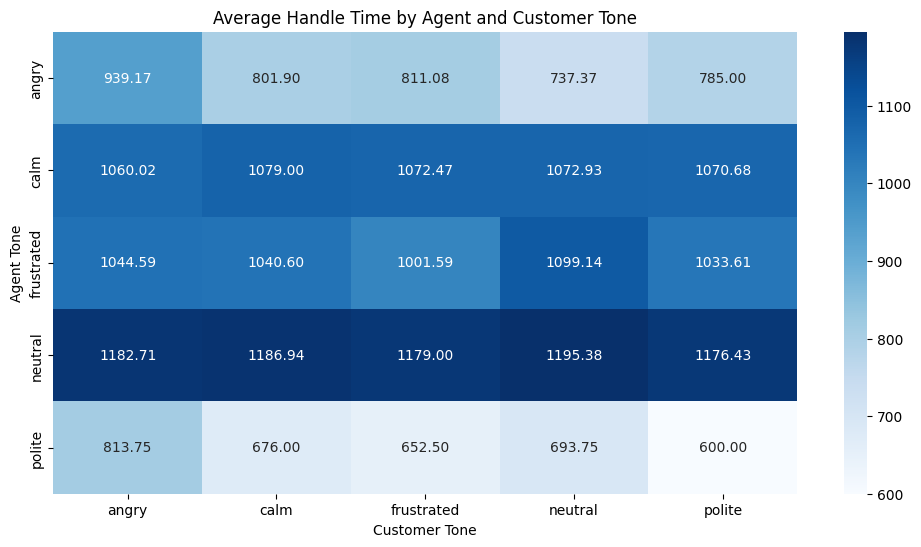


Average Handle Time (AHT) by Average Sentiment:
average_sentiment
-0.66    2220.000000
 0.76    2100.000000
-0.01    1575.817774
 0.01    1548.303249
-0.02    1413.276776
            ...     
-1.22     360.000000
 0.83     270.000000
-1.10     240.000000
-1.17     240.000000
-0.90     180.000000
Name: handle_time, Length: 180, dtype: float64


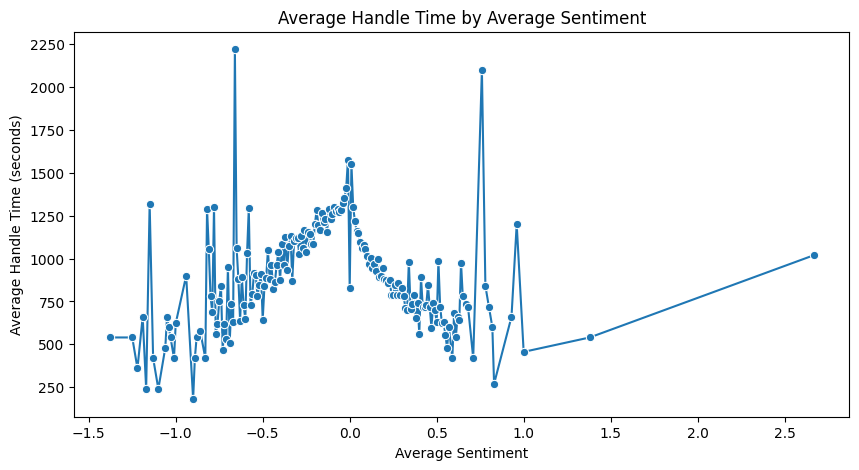

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `mergedDF` is the dataframe
# 1. Convert columns to proper formats
mergedDF['call_start_datetime'] = pd.to_datetime(mergedDF['call_start_datetime'])
mergedDF['agent_assigned_datetime'] = pd.to_datetime(mergedDF['agent_assigned_datetime'])
mergedDF['call_end_datetime'] = pd.to_datetime(mergedDF['call_end_datetime'])

# Convert handle_time and waiting_time to numeric
mergedDF['handle_time'] = pd.to_numeric(mergedDF['handle_time'], errors='coerce')
mergedDF['waiting_time'] = pd.to_numeric(mergedDF['waiting_time'], errors='coerce')

# Clean primary_call_reason by removing extra spaces and normalizing
mergedDF['primary_call_reason'] = mergedDF['primary_call_reason'].str.strip().str.lower()
mergedDF['primary_call_reason'] = mergedDF['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)

# 1. Analyze Agent Performance (based on agent_tone)
agent_tone_aht = mergedDF.groupby('agent_tone')['handle_time'].mean().sort_values(ascending=False)
print("\nAverage Handle Time (AHT) by Agent Tone:")
print(agent_tone_aht)

# Visualize Agent Tone and Handle Time
plt.figure(figsize=(10, 5))
sns.barplot(x=agent_tone_aht.index, y=agent_tone_aht.values)
plt.title('Average Handle Time by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Handle Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# 2. Analyze Call Types (primary_call_reason)
call_reason_aht = mergedDF.groupby('primary_call_reason')['handle_time'].mean().sort_values(ascending=False)
print("\nAverage Handle Time (AHT) by Call Type:")
print(call_reason_aht)

# Visualize Call Type and Handle Time
plt.figure(figsize=(12, 8))
sns.barplot(x=call_reason_aht.values, y=call_reason_aht.index)
plt.title('Average Handle Time by Call Type')
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Call Type')
plt.show()

# 3. Analyze Sentiment Impact (agent_tone and customer_tone)
sentiment_aht = mergedDF.groupby(['agent_tone', 'customer_tone'])['handle_time'].mean().unstack()
print("\nAverage Handle Time (AHT) by Agent and Customer Tone:")
print(sentiment_aht)

# Visualize Agent and Customer Sentiment with Handle Time
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_aht, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Handle Time by Agent and Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
plt.show()

# 4. Analyze Average Sentiment's impact on AHT
sentiment_vs_aht = mergedDF.groupby('average_sentiment')['handle_time'].mean().sort_values(ascending=False)
print("\nAverage Handle Time (AHT) by Average Sentiment:")
print(sentiment_vs_aht)

# Visualize Average Sentiment and Handle Time
plt.figure(figsize=(10, 5))
sns.lineplot(x=sentiment_vs_aht.index, y=sentiment_vs_aht.values, marker='o')
plt.title('Average Handle Time by Average Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Handle Time (seconds)')
plt.show()


Average Handle Time (AHT) during high volume periods: 1132.57 seconds
Average Speed to Answer (AST) during high volume periods: 437.34 seconds

Average Handle Time (AHT) by Agent Tone during High Volume:
agent_tone
neutral       1181.788496
calm          1066.199209
frustrated    1063.201893
polite         837.142857
angry          818.769231
Name: handle_time, dtype: float64


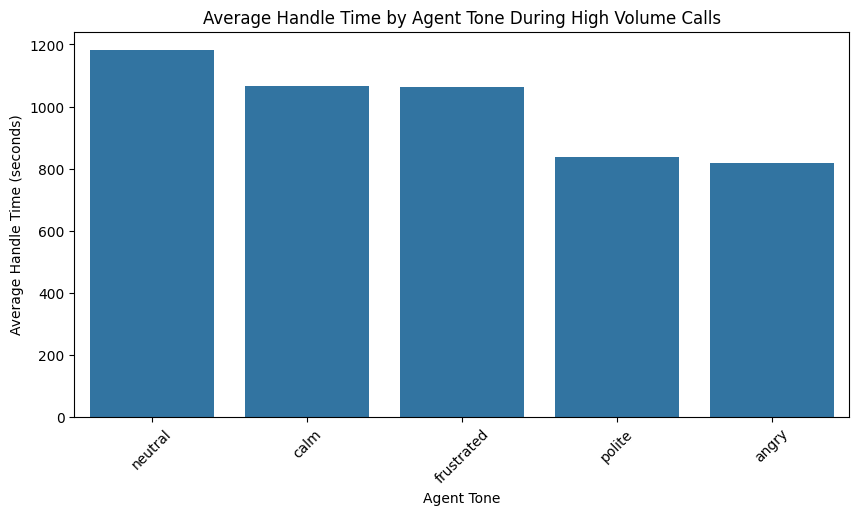


Average Handle Time (AHT) by Call Type during High Volume:
primary_call_reason
checkout               1778.205882
post-flight            1484.320298
etc                    1395.176471
mileage plus           1374.474041
voluntary cancel       1255.392491
voluntary change       1184.201930
unaccompanied minor    1155.428571
irrops                 1138.704503
traveler updates       1077.745665
communications         1063.374545
products & services    1048.186275
seating                1044.403274
upgrade                 916.720322
check in                911.612903
check-in                905.424354
digital support         878.785249
baggage                 878.123791
disability              806.571429
schedule change         706.570397
booking                 655.650320
other topics            605.838926
Name: handle_time, dtype: float64


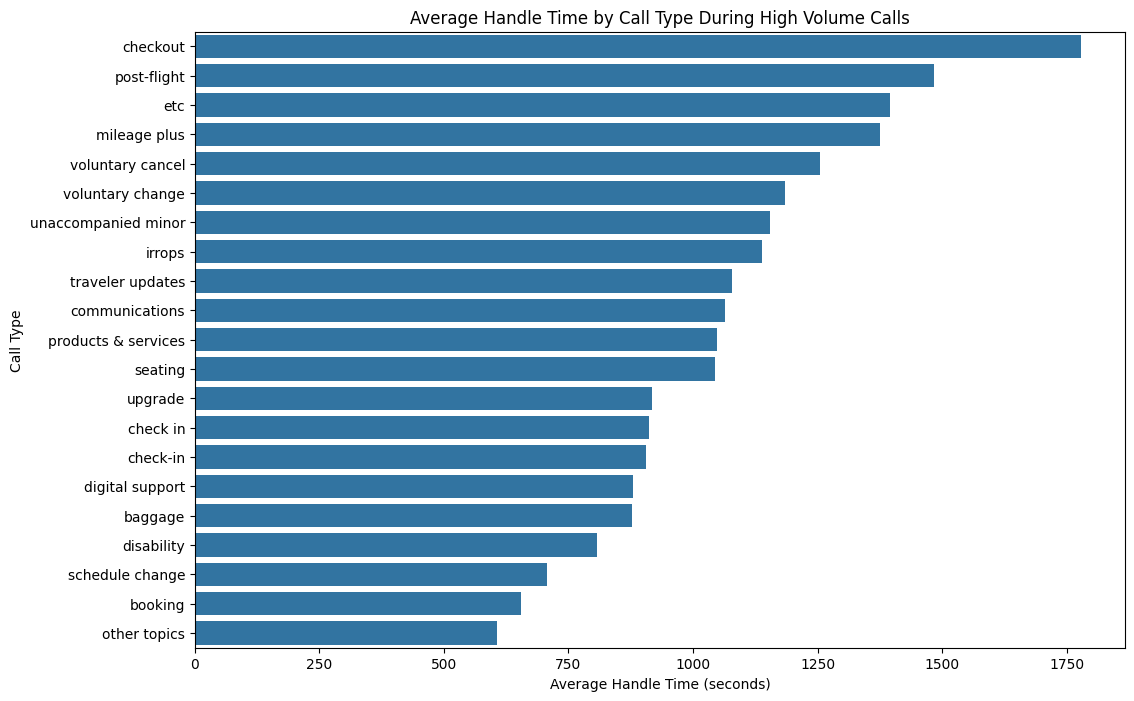


Average Speed to Answer (AST) by Agent Tone during High Volume:
agent_tone
polite        497.142857
calm          443.732470
neutral       434.702828
frustrated    426.813880
angry         426.000000
Name: waiting_time, dtype: float64


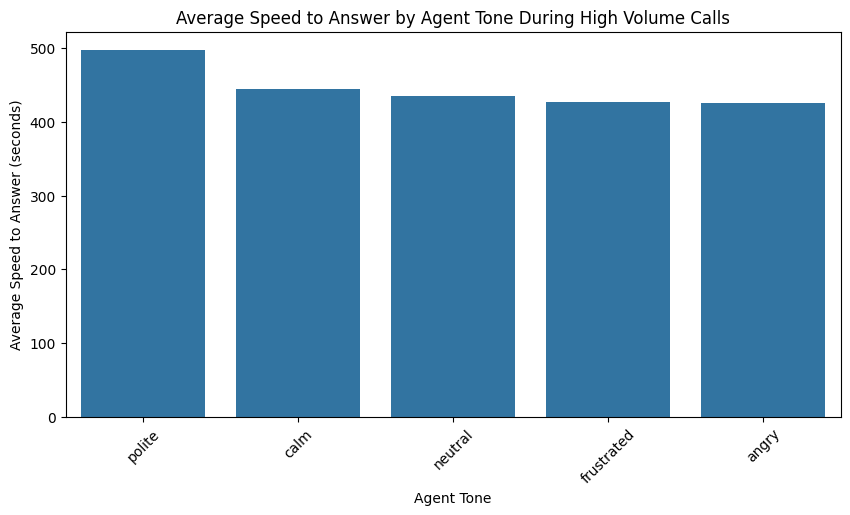


Average Speed to Answer (AST) by Call Type during High Volume:
primary_call_reason
checkout               723.882353
traveler updates       690.000000
unaccompanied minor    682.285714
seating                571.202068
post-flight            568.864060
etc                    544.941176
baggage                541.682785
voluntary change       540.489978
voluntary cancel       538.566553
disability             507.428571
digital support        504.078091
check in               366.967742
mileage plus           361.300226
irrops                 360.246761
check-in               351.918819
products & services    303.431373
upgrade                300.120724
other topics           239.798658
schedule change        239.133574
communications         238.734545
booking                238.081023
Name: waiting_time, dtype: float64


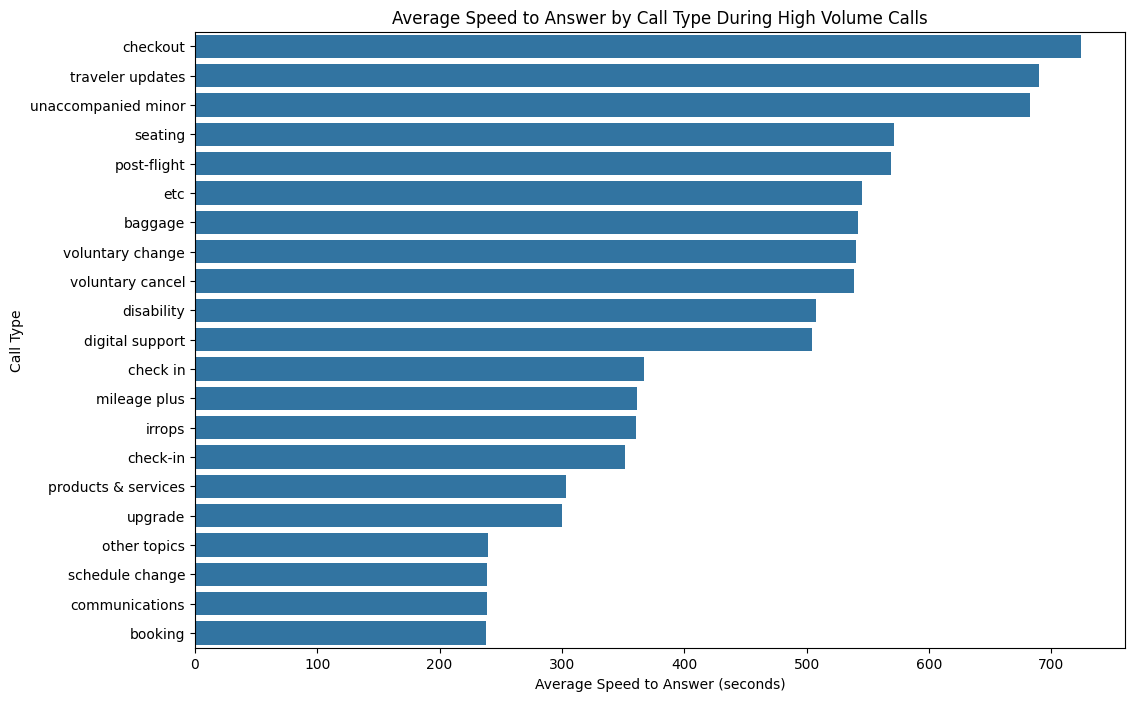

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `mergedDF` is the dataframe

# 1. Convert columns to proper formats
mergedDF['call_start_datetime'] = pd.to_datetime(mergedDF['call_start_datetime'])
mergedDF['agent_assigned_datetime'] = pd.to_datetime(mergedDF['agent_assigned_datetime'])
mergedDF['call_end_datetime'] = pd.to_datetime(mergedDF['call_end_datetime'])

# Convert handle_time and waiting_time to numeric
mergedDF['handle_time'] = pd.to_numeric(mergedDF['handle_time'], errors='coerce')
mergedDF['waiting_time'] = pd.to_numeric(mergedDF['waiting_time'], errors='coerce')

# Clean primary_call_reason by removing extra spaces and normalizing
mergedDF['primary_call_reason'] = mergedDF['primary_call_reason'].str.strip().str.lower()
mergedDF['primary_call_reason'] = mergedDF['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)

# 2. Determine High Volume Call Periods
# Extract hour from call start datetime
mergedDF['call_hour'] = mergedDF['call_start_datetime'].dt.hour

# Count calls per hour
call_counts_per_hour = mergedDF.groupby('call_hour').size()

# Define high volume threshold (e.g., top 20% of hours)
high_volume_threshold = call_counts_per_hour.quantile(0.8)
high_volume_hours = call_counts_per_hour[call_counts_per_hour >= high_volume_threshold].index

# Filter the DataFrame for high-volume hours
high_volume_calls = mergedDF[mergedDF['call_hour'].isin(high_volume_hours)]

# Calculate AHT and AST for high-volume periods
high_volume_AHT = high_volume_calls['handle_time'].mean()
high_volume_AST = high_volume_calls['waiting_time'].mean()

print(f"Average Handle Time (AHT) during high volume periods: {high_volume_AHT:.2f} seconds")
print(f"Average Speed to Answer (AST) during high volume periods: {high_volume_AST:.2f} seconds")

# 3. Analyze Factors Affecting AHT and AST During High Volume Periods

# AHT by Agent Tone during High Volume
agent_tone_aht_high_volume = high_volume_calls.groupby('agent_tone')['handle_time'].mean().sort_values(ascending=False)
print("\nAverage Handle Time (AHT) by Agent Tone during High Volume:")
print(agent_tone_aht_high_volume)

# Visualize Agent Tone and AHT during High Volume
plt.figure(figsize=(10, 5))
sns.barplot(x=agent_tone_aht_high_volume.index, y=agent_tone_aht_high_volume.values)
plt.title('Average Handle Time by Agent Tone During High Volume Calls')
plt.xlabel('Agent Tone')
plt.ylabel('Average Handle Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# AHT by Call Type during High Volume
call_reason_aht_high_volume = high_volume_calls.groupby('primary_call_reason')['handle_time'].mean().sort_values(ascending=False)
print("\nAverage Handle Time (AHT) by Call Type during High Volume:")
print(call_reason_aht_high_volume)

# Visualize Call Type and AHT during High Volume
plt.figure(figsize=(12, 8))
sns.barplot(x=call_reason_aht_high_volume.values, y=call_reason_aht_high_volume.index)
plt.title('Average Handle Time by Call Type During High Volume Calls')
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Call Type')
plt.show()

# AST by Agent Tone during High Volume
agent_tone_ast_high_volume = high_volume_calls.groupby('agent_tone')['waiting_time'].mean().sort_values(ascending=False)
print("\nAverage Speed to Answer (AST) by Agent Tone during High Volume:")
print(agent_tone_ast_high_volume)

# Visualize Agent Tone and AST during High Volume
plt.figure(figsize=(10, 5))
sns.barplot(x=agent_tone_ast_high_volume.index, y=agent_tone_ast_high_volume.values)
plt.title('Average Speed to Answer by Agent Tone During High Volume Calls')
plt.xlabel('Agent Tone')
plt.ylabel('Average Speed to Answer (seconds)')
plt.xticks(rotation=45)
plt.show()

# AST by Call Type during High Volume
call_reason_ast_high_volume = high_volume_calls.groupby('primary_call_reason')['waiting_time'].mean().sort_values(ascending=False)
print("\nAverage Speed to Answer (AST) by Call Type during High Volume:")
print(call_reason_ast_high_volume)

# Visualize Call Type and AST during High Volume
plt.figure(figsize=(12, 8))
sns.barplot(x=call_reason_ast_high_volume.values, y=call_reason_ast_high_volume.index)
plt.title('Average Speed to Answer by Call Type During High Volume Calls')
plt.xlabel('Average Speed to Answer (seconds)')
plt.ylabel('Call Type')
plt.show()


Call Reasons with Low Sentiment and High AHT:
    primary_call_reason  average_aht  average_sentiment  call_count
3              checkout  1741.557203          -0.069030        1888
4        communications  1066.687500          -0.036392        3840
5                irrops  1145.197205          -0.074065       13311
6          mileage plus  1356.588617          -0.027398        5851
7           post-flight  1502.327945          -0.063914        4330
8   products & services  1049.009604          -0.034430        3332
9               seating  1045.819324          -0.002770        6365
11     voluntary cancel  1261.381456          -0.031512        1607
12     voluntary change  1179.640487          -0.003826       10848


C:\Users\aksha\AppData\Local\Temp\ipykernel_60348\2534155177.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_sentiment_high_aht, x='average_aht', y='primary_call_reason', palette='viridis')


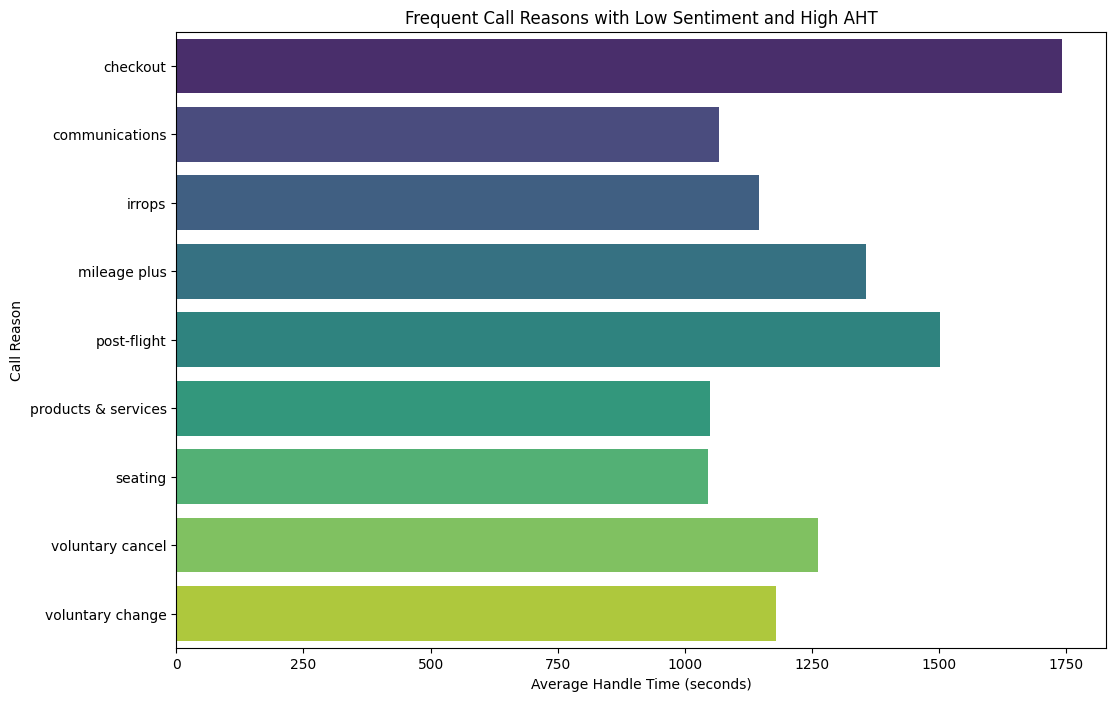


Proposed IVR Improvements:
Booking Issues: Enhance IVR options to allow customers to modify or cancel bookings through self-service.
Mileage Plus Inquiries: Provide an IVR option to check Mileage Plus status and points balance.
Flight Status Updates: Implement an option to check flight status via IVR without needing to speak to an agent.
Change Flight Requests: Allow customers to change their flights through the IVR system to reduce call volume.
Voluntary Cancel: Introduce an IVR self-service option specifically for customers who wish to cancel their flights.
Voluntary Change: Enhance IVR capabilities to enable customers to easily change their flight details directly through the system.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `mergedDF` is the DataFrame with relevant data

# Step 1: Clean and Prepare Data
mergedDF['primary_call_reason'] = mergedDF['primary_call_reason'].str.strip().str.lower()
mergedDF['primary_call_reason'] = mergedDF['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)

# Step 2: Identify Recurring Call Reasons
call_reason_counts = mergedDF['primary_call_reason'].value_counts()
frequent_call_reasons = call_reason_counts[call_reason_counts > 1500]  # Adjust threshold as needed

# Step 3: Analyze Sentiment and AHT for Frequent Call Reasons
frequent_call_reasons_df = mergedDF[mergedDF['primary_call_reason'].isin(frequent_call_reasons.index)]

# Group by call reason and calculate average AHT and sentiment
call_reason_analysis = frequent_call_reasons_df.groupby('primary_call_reason').agg(
    average_aht=('handle_time', 'mean'),
    average_sentiment=('average_sentiment', 'mean'),
    call_count=('call_id', 'count')
).reset_index()

# Filter call reasons with low sentiment and high AHT
low_sentiment_high_aht = call_reason_analysis[
    (call_reason_analysis['average_sentiment'] < 0) & (call_reason_analysis['average_aht'] > 1000)  # Customize threshold
]

print("Call Reasons with Low Sentiment and High AHT:")
print(low_sentiment_high_aht)

# Visualize Call Reasons with Low Sentiment and High AHT
plt.figure(figsize=(12, 8))
sns.barplot(data=low_sentiment_high_aht, x='average_aht', y='primary_call_reason', palette='viridis')
plt.title('Frequent Call Reasons with Low Sentiment and High AHT')
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Call Reason')
plt.show()

# Step 4: Propose Improvements to IVR Options
proposed_improvements = {
    'Booking Issues': 'Enhance IVR options to allow customers to modify or cancel bookings through self-service.',
    'Mileage Plus Inquiries': 'Provide an IVR option to check Mileage Plus status and points balance.',
    'Flight Status Updates': 'Implement an option to check flight status via IVR without needing to speak to an agent.',
    'Change Flight Requests': 'Allow customers to change their flights through the IVR system to reduce call volume.',
    'Voluntary Cancel': 'Introduce an IVR self-service option specifically for customers who wish to cancel their flights.',
    'Voluntary Change': 'Enhance IVR capabilities to enable customers to easily change their flight details directly through the system.'
}


print("\nProposed IVR Improvements:")
for issue, improvement in proposed_improvements.items():
    print(f"{issue}: {improvement}")


Booking Issues:

Improvement: Enhance IVR options to allow customers to modify or cancel bookings through self-service.
Reasoning: Many customers call for booking modifications or cancellations. Allowing these tasks to be done via IVR can significantly reduce call volume.
Mileage Plus Inquiries:

Improvement: Provide an IVR option to check Mileage Plus status and points balance.
Reasoning: Frequent inquiries about mileage status can be easily resolved with automated responses, thus freeing agents for more complex inquiries.
Flight Status Updates:

Improvement: Implement an option to check flight status via IVR without needing to speak to an agent.
Reasoning: Customers often call to inquire about flight statuses. An IVR option could provide real-time updates without involving an agent.
Change Flight Requests:

Improvement: Allow customers to change their flights through the IVR system to reduce call volume.
Reasoning: Changes to flights are common requests and could be streamlined through a more robust IVR system.
Voluntary Cancel:

Improvement: Introduce an IVR self-service option specifically for customers who wish to cancel their flights.
Reasoning: This would provide a dedicated self-service channel for customers looking to cancel flights, reducing the burden on agents.
Voluntary Change:

Improvement: Enhance IVR capabilities to enable customers to easily change their flight details directly through the system.
Reasoning: Enabling self-service for voluntary changes would alleviate the number of calls directed to agents for this purpose, improving overall efficiency.

C:\Users\aksha\AppData\Local\Temp\ipykernel_60348\1667210137.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=call_reason_counts.values[:10], y=call_reason_counts.index[:10], palette='viridis')


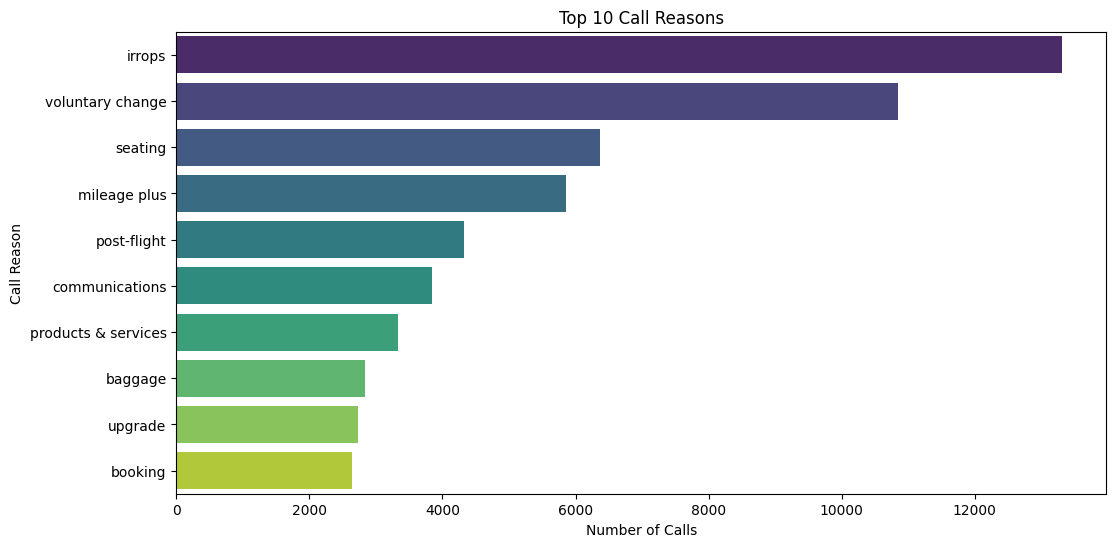

C:\Users\aksha\AppData\Local\Temp\ipykernel_60348\1667210137.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_handle_time', y='primary_call_reason', data=reason_analysis.sort_values(by='average_handle_time', ascending=False), palette='coolwarm')


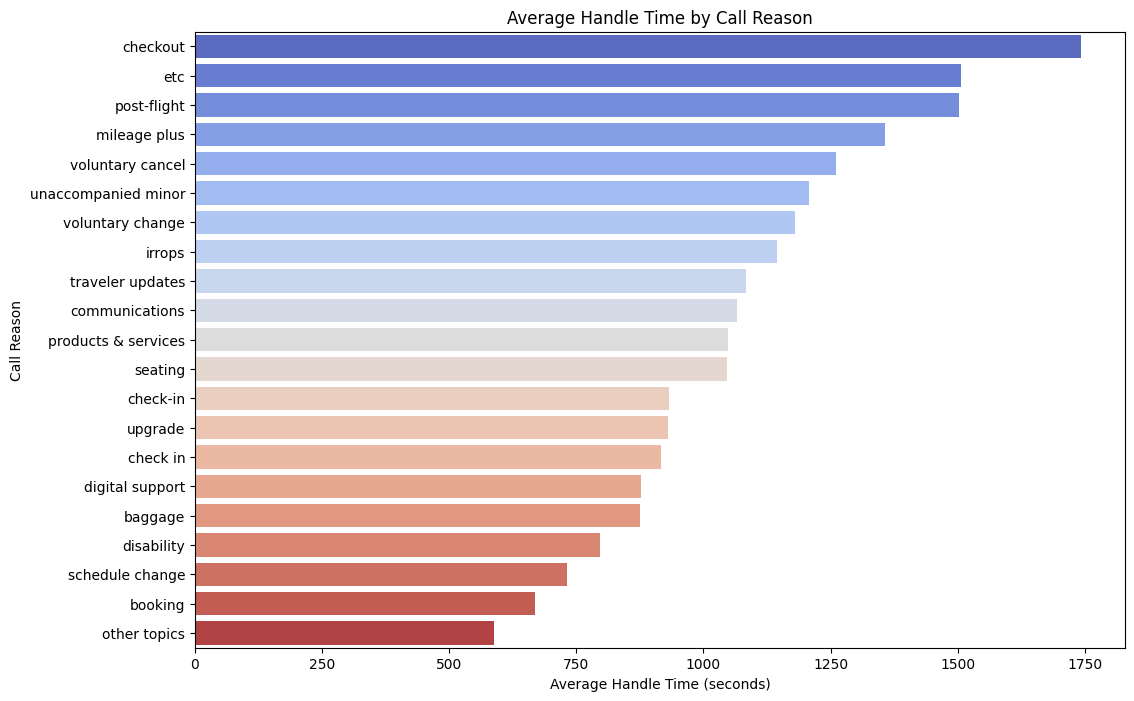

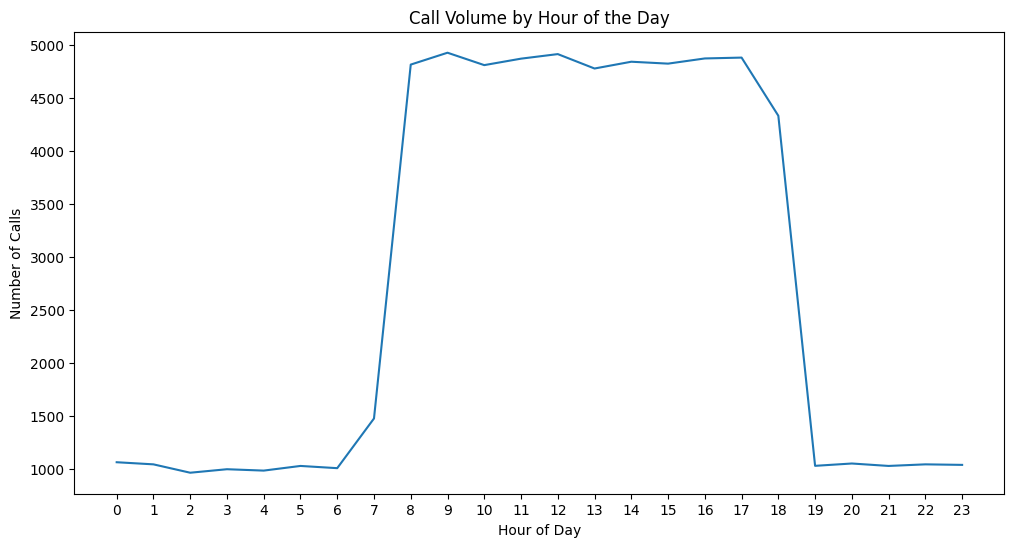

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset


# Step 1: Data Preparation
# Clean primary call reason
mergedDF['primary_call_reason'] = mergedDF['primary_call_reason'].str.strip().str.lower()

# Step 2: EDA
# Frequency distribution of call reasons
call_reason_counts = mergedDF['primary_call_reason'].value_counts()

# Plotting frequency of call reasons
plt.figure(figsize=(12, 6))
sns.barplot(x=call_reason_counts.values[:10], y=call_reason_counts.index[:10], palette='viridis')
plt.title('Top 10 Call Reasons')
plt.xlabel('Number of Calls')
plt.ylabel('Call Reason')
plt.show()

# Step 3: Pattern Identification
# Group by call reason and calculate average handle time
reason_analysis = mergedDF.groupby('primary_call_reason').agg(
    average_handle_time=('handle_time', 'mean'),
    total_calls=('call_id', 'count')
).reset_index()

# Plot average handle time by call reason
plt.figure(figsize=(12, 8))
sns.barplot(x='average_handle_time', y='primary_call_reason', data=reason_analysis.sort_values(by='average_handle_time', ascending=False), palette='coolwarm')
plt.title('Average Handle Time by Call Reason')
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Call Reason')
plt.show()

# Step 4: Feature Engineering
# Create new features (e.g., broader categories, time-based features)
mergedDF['call_date'] = pd.to_datetime(mergedDF['call_start_datetime']).dt.date
mergedDF['call_hour'] = pd.to_datetime(mergedDF['call_start_datetime']).dt.hour

# Step 5: Visualization
# Visualize call volume by hour
call_volume_by_hour = mergedDF['call_hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=call_volume_by_hour.index, y=call_volume_by_hour.values)
plt.title('Call Volume by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.xticks(range(24))
plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_60348\2432235798.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=call_reason_counts.values[:10], y=call_reason_counts.index[:10], palette='viridis')


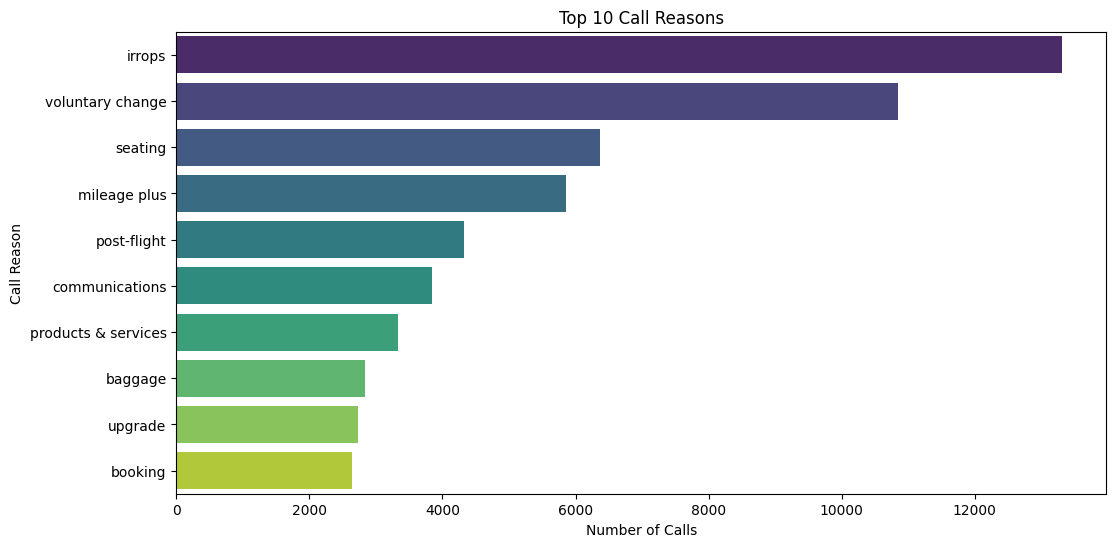

C:\Users\aksha\AppData\Local\Temp\ipykernel_60348\2432235798.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='handle_time', y='primary_call_reason', data=aht_by_reason.sort_values('handle_time', ascending=False), palette='coolwarm')


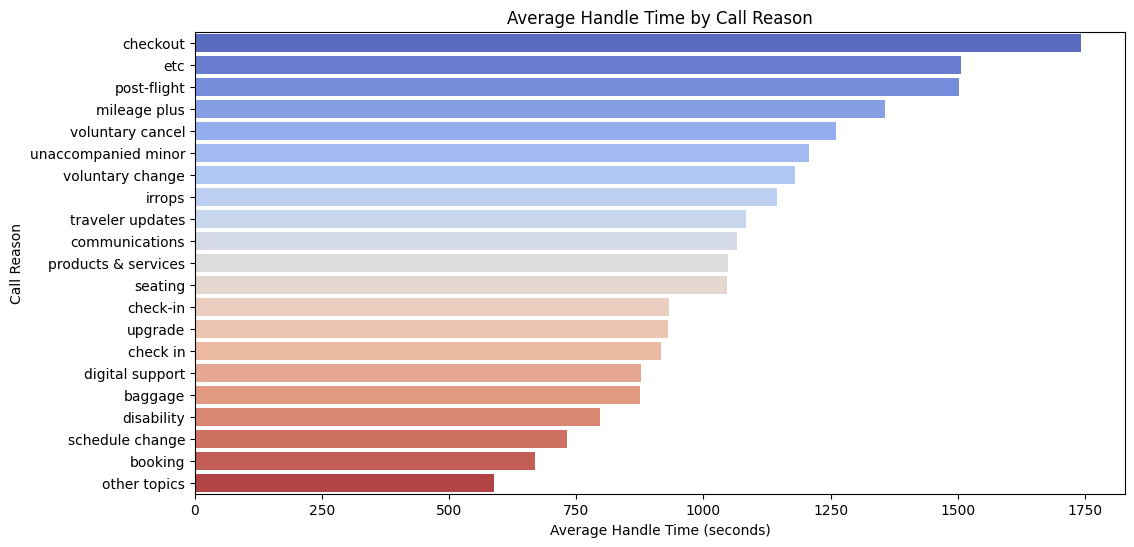

C:\Users\aksha\AppData\Local\Temp\ipykernel_60348\2432235798.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='waiting_time', y='primary_call_reason', data=ast_by_reason.sort_values('waiting_time', ascending=False), palette='magma')


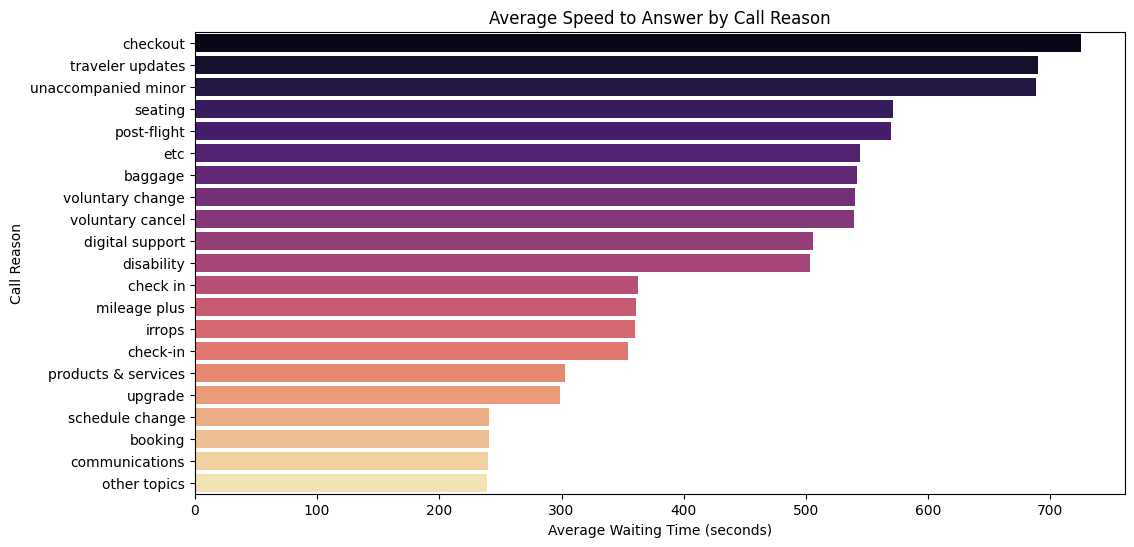

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = mergedDF

# Clean primary_call_reason
data['primary_call_reason'] = data['primary_call_reason'].str.strip().str.lower()

# 1. Frequency of Call Reasons
call_reason_counts = data['primary_call_reason'].value_counts()

# 2. Average Handle Time (AHT) by Call Reason
aht_by_reason = data.groupby('primary_call_reason')['handle_time'].mean().reset_index()

# 3. Average Speed to Answer (AST) by Call Reason
ast_by_reason = data.groupby('primary_call_reason')['waiting_time'].mean().reset_index()

# Plotting Frequency of Call Reasons
plt.figure(figsize=(12, 6))
sns.barplot(x=call_reason_counts.values[:10], y=call_reason_counts.index[:10], palette='viridis')
plt.title('Top 10 Call Reasons')
plt.xlabel('Number of Calls')
plt.ylabel('Call Reason')
plt.show()

# Plotting AHT by Call Reason
plt.figure(figsize=(12, 6))
sns.barplot(x='handle_time', y='primary_call_reason', data=aht_by_reason.sort_values('handle_time', ascending=False), palette='coolwarm')
plt.title('Average Handle Time by Call Reason')
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Call Reason')
plt.show()

# Plotting AST by Call Reason
plt.figure(figsize=(12, 6))
sns.barplot(x='waiting_time', y='primary_call_reason', data=ast_by_reason.sort_values('waiting_time', ascending=False), palette='magma')
plt.title('Average Speed to Answer by Call Reason')
plt.xlabel('Average Waiting Time (seconds)')
plt.ylabel('Call Reason')
plt.show()
